# Data Science Training

## 00 Introduction to Data Science

## Data Science

Data science is all about using **data to solve problems** and can be applied in any fields. The problems that can be solved using data science could be decision making such as detecting transaction fraud. Or a product recommendation such as which song to listen to? Or predicting the outcome such as sale forecast? So, the core job of a data scientist is to understand the data, extract useful information out of it and apply this in solving the problems.

In short data science involves 3 fields of knowledge - Domain knowledge, mathematics and statistics, and programming.

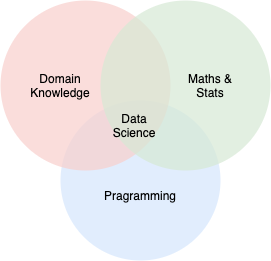

## Data Science Process with an Example

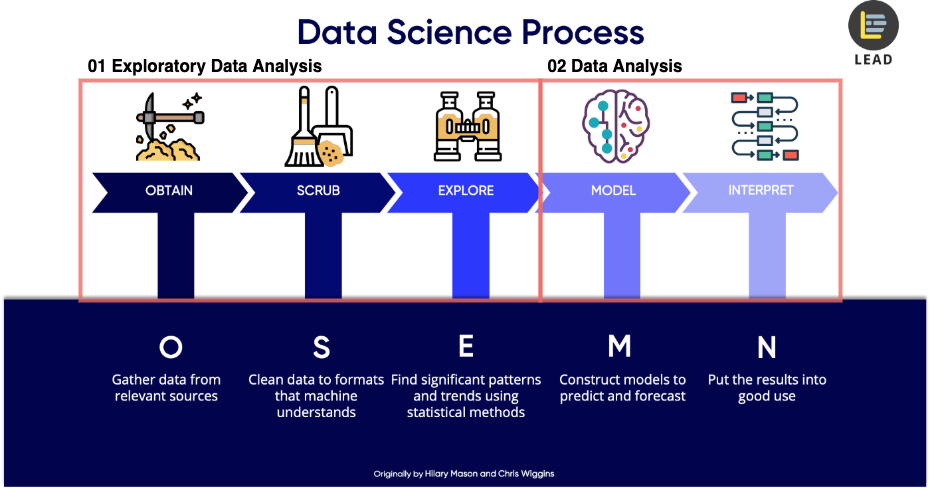

### 1 Exploratory Data Analysis
#### 1.1 Obtaining Data
The very first step of any data science project is straightforward, that is to collect and obtain the data you need.

#### Example
Eg. To predict Life Expectancy of population from the data of the Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import eli5 
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
path = 'data/Life_Expectancy_Data.csv'
df = pd.read_csv(path)  #read_excel => return dataframe

# print the first rows of data
# your code here
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


#### 1.2 Scrubbing Data
Scrubbing data process is to “clean” and filter the data. Remember the **“garbage in, garbage out”** philosophy in which if the data used is unfiltered and irrelevant, the results of the analysis will not mean anything as well. 

#### Example
Drop data that contains N and NaN

In [ ]:
df = df.dropna(axis=0, how='any')

Clean data to formulate into a machine understandable form

In [ ]:
print(df["Status"])
print("="*70)
print("unique values of Status column: ", df["Status"].unique())

0       Developing
1       Developing
2       Developing
3       Developing
4       Developing
           ...    
2933    Developing
2934    Developing
2935    Developing
2936    Developing
2937    Developing
Name: Status, Length: 1649, dtype: object
unique values of Status column:  ['Developing' 'Developed']


Transform "Developing" >>> 0 and "Developed" >>> 1

In [ ]:
le = LabelEncoder()
df["Status"] = le.fit_transform(df["Status"])

In [ ]:
print(df["Status"])
print("="*70)
print("unique values of Status column: ", df["Status"].unique())

0       1
1       1
2       1
3       1
4       1
       ..
2933    1
2934    1
2935    1
2936    1
2937    1
Name: Status, Length: 1649, dtype: int64
unique values of Status column:  [1 0]


#### 1.3 Exploring Data
First of all, you will need to inspect the data and all its properties. There are different types of data like numerical data, categorical data, ordinal and nominal data etc. With that, there are different types of data characteristics which will require you to handle them differently.

Then, the next step is to compute descriptive statistics to extract features and test significant variables. The term “Feature” used in Machine Learning or Modelling, is the data features that help us to identify the characteristics that represent the data. For example, “Name”, “Age”, “Gender” are typical features of members or employees dataset.

Lastly, we will utilise data visualisation to help us to identify significant patterns and trends in our data. We can gain a better picture through simple charts like line charts or bar charts to help us to understand the importance of the data.

#### Example

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


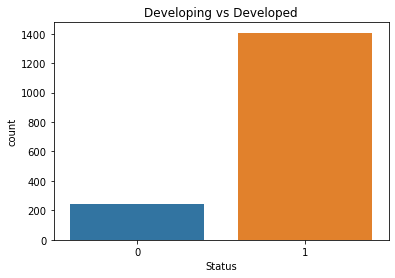

In [ ]:
sns.countplot(df['Status'], dodge=True)
plt.title("Developing vs Developed")
plt.show()

### 2 Data Analysis
#### 2.1 Modelling Data
This step is **“where the magic happens”.**

Once again, before reaching to this stage, bear in mind that the scrubbing and exploring stage is crucial in order for this process to make sense. So take your time on those stages instead of jumping right to this process.

One of the first things you need to do in modelling data, is to reduce the dimensionality of your data set. Not all your features or values are essential to predicting your model. Hence, what you need to do is to select the relevant ones that will contribute to the prediction of results you are looking for.

Afterwards, it is to select the appropriate model to solve your data science problems. In short, we use regression and predictions for forecasting future values, and classification to identify, and clustering to group values.


#### Example
Define your X and y where X is your inputs and y is your target

In [ ]:
df_ = df.drop(['Country', 'Year', 'infant deaths', 'Life expectancy '],1)
X = df_

y = df["Life expectancy "]

/tmp/ipykernel_299/404314012.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_ = df.drop(['Country', 'Year', 'infant deaths', 'Life expectancy '],1)


Split your data so that you can test the performance of your model on the unseen data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (1236, 18)
Shape of X_test:  (413, 18)
Shape of y_train:  (1236,)
Shape of y_test:  (413,)


Scale your data

In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)  #you need to use the same mean as X_train

Choose the correct model and performance matrix

In [ ]:
model = DecisionTreeRegressor(random_state = 0)
model.fit(X_train,y_train) 

y_train_predict = model.predict(X_train) 
y_test_predict = model.predict(X_test)

# Calculate mean square error and mean absolute error of traing data
mse_train = round(mean_squared_error(y_train, y_train_predict),4)
mae_train = round(mean_absolute_error(y_train, y_train_predict),4)

# Calculate mean square error and mean absolute error of testing data
# Your code here
mse_test = round(mean_squared_error(y_test, y_test_predict),4)
mae_test = round(mean_absolute_error(y_test, y_test_predict),4)

print("Mean Squared Error Training: ",mse_train)
print("Mean Squared Error Testing: ",mse_test)
print("Mean Absolute Error Training: ",mae_train)
print("Mean Absolute Error Testing: ",mae_test)

Mean Squared Error Training:  0.0
Mean Squared Error Testing:  6.9495
Mean Absolute Error Training:  0.0
Mean Absolute Error Testing:  1.5697


#### 2.2 Interpreting Data
We are at the final and **most important step** of the data science project, that is, interpreting data. Interpreting data basically refers to the presentation of your data, delivering the results in such a way that is able to answer the business questions you asked when you first started the project, together with the actionable insights that is found through data science.

#### Example

In [ ]:
feat_imp_df = eli5.formatters.as_dataframe.explain_weights_df(
    model,
    feature_names=list(df_.columns))
feat_imp_df.head(10)

,feature,weight
0,Income composition of resources,0.664286
1,Adult Mortality,0.130291
2,HIV/AIDS,0.122178
3,thinness 1-19 years,0.017901
4,Schooling,0.012602
5,Total expenditure,0.009432
6,thinness 5-9 years,0.008516
7,BMI,0.007035
8,Alcohol,0.005393
9,percentage expenditure,0.005376


## Classic problems in Data Science 
1. Supervised learning - with “labeled” trained data
- Regression e.g. house price prediction
- Classification e.g. load prediction (Yes/No)
2. Unsupervised learning - with “unlabeled” trained data
- Clustering e.g. customer segmentation



## Important Libraries
1. Numpy
2. Pandas
3. Matplotlib
4. Seaborn
5. Sklearn